In [1]:
import cv2

In [2]:
import numpy as np

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
img = cv2.imread('./test_images/sharapova1.jpg')
img.shape

(555, 700, 3)

In [5]:
l=cv2.imread('./test_images/sharapova2.jpg')
img.shape

(555, 700, 3)

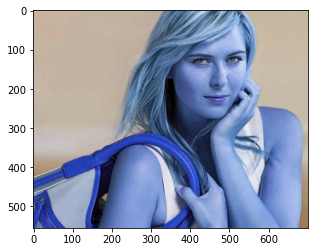

In [6]:
plt.imshow(img)

In [7]:
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
gray.shape

(555, 700)

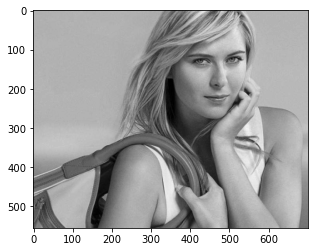

In [10]:
plt.imshow(gray,cmap="gray")

In [11]:
gray

array([[175, 175, 175, ..., 176, 175, 174],
       [175, 175, 175, ..., 177, 175, 174],
       [175, 175, 175, ..., 177, 176, 174],
       ...,
       [ 84,  87,  88, ..., 113, 113, 113],
       [ 88,  89,  90, ..., 113, 113, 113],
       [ 93,  91,  91, ..., 112, 112, 112]], dtype=uint8)

In [12]:
face_cascade=cv2.CascadeClassifier('./Haarcascade/haarcascade_frontalface_default.xml')

In [13]:
faces=face_cascade.detectMultiScale(gray,1.3,5)

In [14]:
faces

array([[352,  38, 233, 233]], dtype=int32)

In [15]:
(x,y,w,h)=faces[0]
x,y,w,h

(352, 38, 233, 233)

In [16]:
face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)

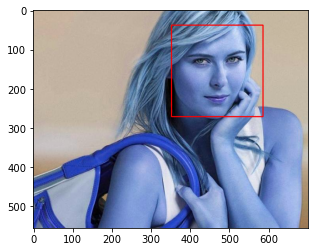

In [17]:
plt.imshow(face_img)

In [18]:
eye_cascade=cv2.CascadeClassifier('./Haarcascade/haarcascade_eye.xml')

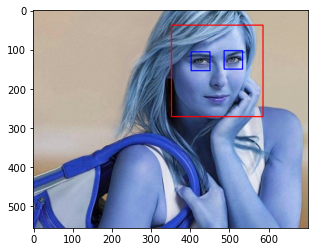

In [27]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    face_img=cv2.rectangle(img,(x,y),(x+w,y+h),(255,0,0),2)
    roi_gray=gray[y:y+h,x:x+w]
    roi_color=face_img[y:y+h,x:x+w]
    eyes=eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(0,0,255),2)
        
plt.imshow(face_img,cmap="gray")

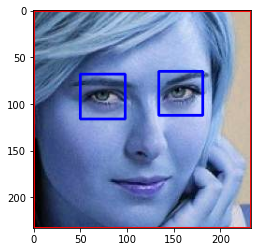

In [29]:
plt.imshow(roi_color,cmap="gray")

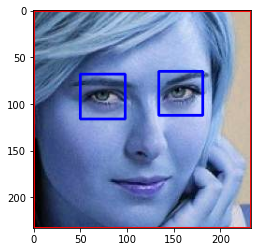

In [30]:
plt.imshow(roi_color)

In [35]:
def get_cropped_image_if_2_eyes(image_path):
    img=cv2.imread(image_path)
    gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
    faces=face_cascade.detectMultiScale(gray,1.3,5)
    for (x,y,w,h) in faces:
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=img[y:y+h,x:x+w]
        eyes=eye_cascade.detectMultiScale(roi_gray)
        if len(eyes)>=2:
            return roi_color

In [36]:
cropped_image=get_cropped_image_if_2_eyes("./test_images/sharapova1.jpg")

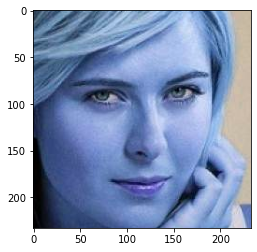

In [37]:
plt.imshow(cropped_image)

In [38]:
one_eye=get_cropped_image_if_2_eyes("./test_images/sharapova2.jpg")

In [40]:
one_eye

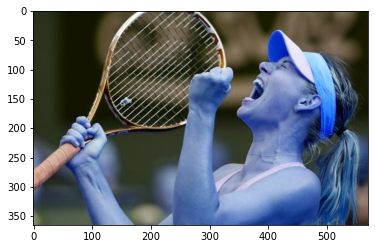

In [41]:
plt.imshow(l)

In [57]:
path_to_data = "./celebs/"
path_to_cr_data = "./celebs/cropped/"

In [58]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [59]:
img_dirs

['./celebs/lionel_messi',
 './celebs/maria_sharapova',
 './celebs/roger_federer',
 './celebs/serena_williams',
 './celebs/virat_kohli']

In [60]:
import shutil
if os.path.exists(path_to_cr_data):
     shutil.rmtree(path_to_cr_data)
os.mkdir(path_to_cr_data)

In [61]:
cropped_image_dirs = []
celebrity_file_names_dict = {}
for img_dir in img_dirs:
    count = 1
    celebrity_name = img_dir.split('/')[-1]
    celebrity_file_names_dict[celebrity_name] = []
    for entry in os.scandir(img_dir):
        roi_color = get_cropped_image_if_2_eyes(entry.path)
        if roi_color is not None:
            cropped_folder = path_to_cr_data + celebrity_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_image_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
            cropped_file_name = celebrity_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name
            cv2.imwrite(cropped_file_path, roi_color)
            celebrity_file_names_dict[celebrity_name].append(cropped_file_path)
            count += 1

Generating cropped images in folder:  ./celebs/cropped/lionel_messi
Generating cropped images in folder:  ./celebs/cropped/maria_sharapova
Generating cropped images in folder:  ./celebs/cropped/roger_federer
Generating cropped images in folder:  ./celebs/cropped/serena_williams
Generating cropped images in folder:  ./celebs/cropped/virat_kohli


In [62]:
import numpy as np
import pywt
import cv2    

def w2d(img, mode='haar', level=1):
    imArray = img
    #Datatype conversions
    #convert to grayscale
    imArray = cv2.cvtColor( imArray,cv2.COLOR_RGB2GRAY )
    #convert to float
    imArray =  np.float32(imArray)   
    imArray /= 255;
    # compute coefficients 
    coeffs=pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H=list(coeffs)  
    coeffs_H[0] *= 0;  

    # reconstruction
    imArray_H=pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H =  np.uint8(imArray_H)

    return imArray_H

In [63]:
celebrity_file_names_dict = {}
for img_dir in cropped_image_dirs:
    celebrity_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    celebrity_file_names_dict[celebrity_name] = file_list
celebrity_file_names_dict

{'lionel_messi': ['./celebs/cropped/lionel_messi\\lionel_messi1.png',
  './celebs/cropped/lionel_messi\\lionel_messi10.png',
  './celebs/cropped/lionel_messi\\lionel_messi11.png',
  './celebs/cropped/lionel_messi\\lionel_messi12.png',
  './celebs/cropped/lionel_messi\\lionel_messi14.png',
  './celebs/cropped/lionel_messi\\lionel_messi15.png',
  './celebs/cropped/lionel_messi\\lionel_messi16.png',
  './celebs/cropped/lionel_messi\\lionel_messi17.png',
  './celebs/cropped/lionel_messi\\lionel_messi18.png',
  './celebs/cropped/lionel_messi\\lionel_messi19.png',
  './celebs/cropped/lionel_messi\\lionel_messi2.png',
  './celebs/cropped/lionel_messi\\lionel_messi20.png',
  './celebs/cropped/lionel_messi\\lionel_messi21.png',
  './celebs/cropped/lionel_messi\\lionel_messi23.png',
  './celebs/cropped/lionel_messi\\lionel_messi24.png',
  './celebs/cropped/lionel_messi\\lionel_messi25.png',
  './celebs/cropped/lionel_messi\\lionel_messi26.png',
  './celebs/cropped/lionel_messi\\lionel_messi27.pn

In [64]:
class_dict = {}
count = 0
for celebrity_name in celebrity_file_names_dict.keys():
    class_dict[celebrity_name] = count
    count = count + 1
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}

In [65]:
X, y = [], []
for celebrity_name, training_files in celebrity_file_names_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        scalled_raw_img = cv2.resize(img, (32, 32))
        img_har = w2d(img,'db1',5)
        scalled_img_har = cv2.resize(img_har, (32, 32))
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3,1),scalled_img_har.reshape(32*32,1)))
        X.append(combined_img)
        y.append(class_dict[celebrity_name])

In [68]:
len(X)

156

In [89]:
X

array([[100., 129., 140., ..., 237., 234., 232.],
       [ 14.,  13.,  15., ...,   9., 250., 250.],
       [ 14.,  13.,  15., ...,   9., 250., 250.],
       ...,
       [250., 173., 135., ...,   9.,   4., 252.],
       [ 17.,  35.,  54., ...,  32.,  62., 199.],
       [227., 114.,  27., ..., 245.,   1.,  51.]])

In [70]:
len(X[0])

4096

In [71]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(156, 4096)

In [72]:
from sklearn.svm import SVC

In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [78]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=0)

pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel = 'rbf', C = 10))])
pipe.fit(X_train, y_train)
pipe.score(X_test, y_test)

0.7948717948717948

In [79]:
len(X_train)

117

In [80]:
len(y_train)

117

In [81]:
len(X_test)

39

In [82]:
print(classification_report(y_test,pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.86      0.75      0.80         8
           1       1.00      0.78      0.88         9
           2       0.80      0.80      0.80         5
           3       0.71      0.62      0.67         8
           4       0.69      1.00      0.82         9

    accuracy                           0.79        39
   macro avg       0.81      0.79      0.79        39
weighted avg       0.82      0.79      0.79        39



In [83]:
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [84]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [85]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.881159,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.658696,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.872101,{'logisticregression__C': 1}


In [86]:
best_estimators['logistic_regression'].score(X_test,y_test)

0.8717948717948718

In [87]:
best_estimators['svm'].score(X_test,y_test)

0.8717948717948718

In [88]:
best_estimators['random_forest'].score(X_test,y_test)

0.6410256410256411

In [90]:
best_clf = best_estimators['svm']

In [91]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[6, 0, 0, 2, 0],
       [0, 7, 1, 1, 0],
       [0, 0, 5, 0, 0],
       [0, 1, 0, 7, 0],
       [0, 0, 0, 0, 9]], dtype=int64)

Text(69.0, 0.5, 'Truth')

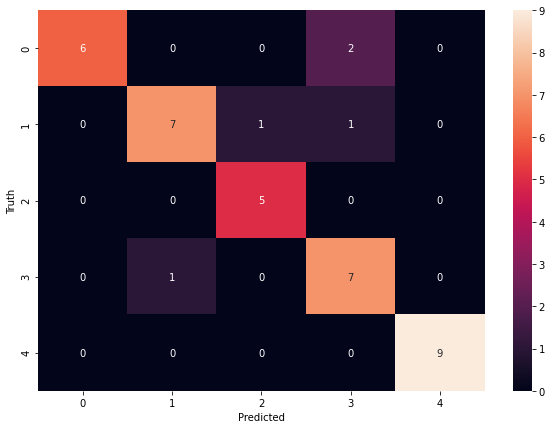

In [92]:


import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')



In [95]:
import joblib

In [96]:

joblib.dump(best_clf, 'saved_model.pkl')

['saved_model.pkl']

In [97]:
import json
with open("class_dictionary.json","w") as f:
    f.write(json.dumps(class_dict))

In [98]:
class_dict

{'lionel_messi': 0,
 'maria_sharapova': 1,
 'roger_federer': 2,
 'serena_williams': 3,
 'virat_kohli': 4}